## Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

In [2]:
stock_df = pd.read_csv("/kaggle/input/nsetataglobal/NSE-TATAGLOBAL11.csv")
stock_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


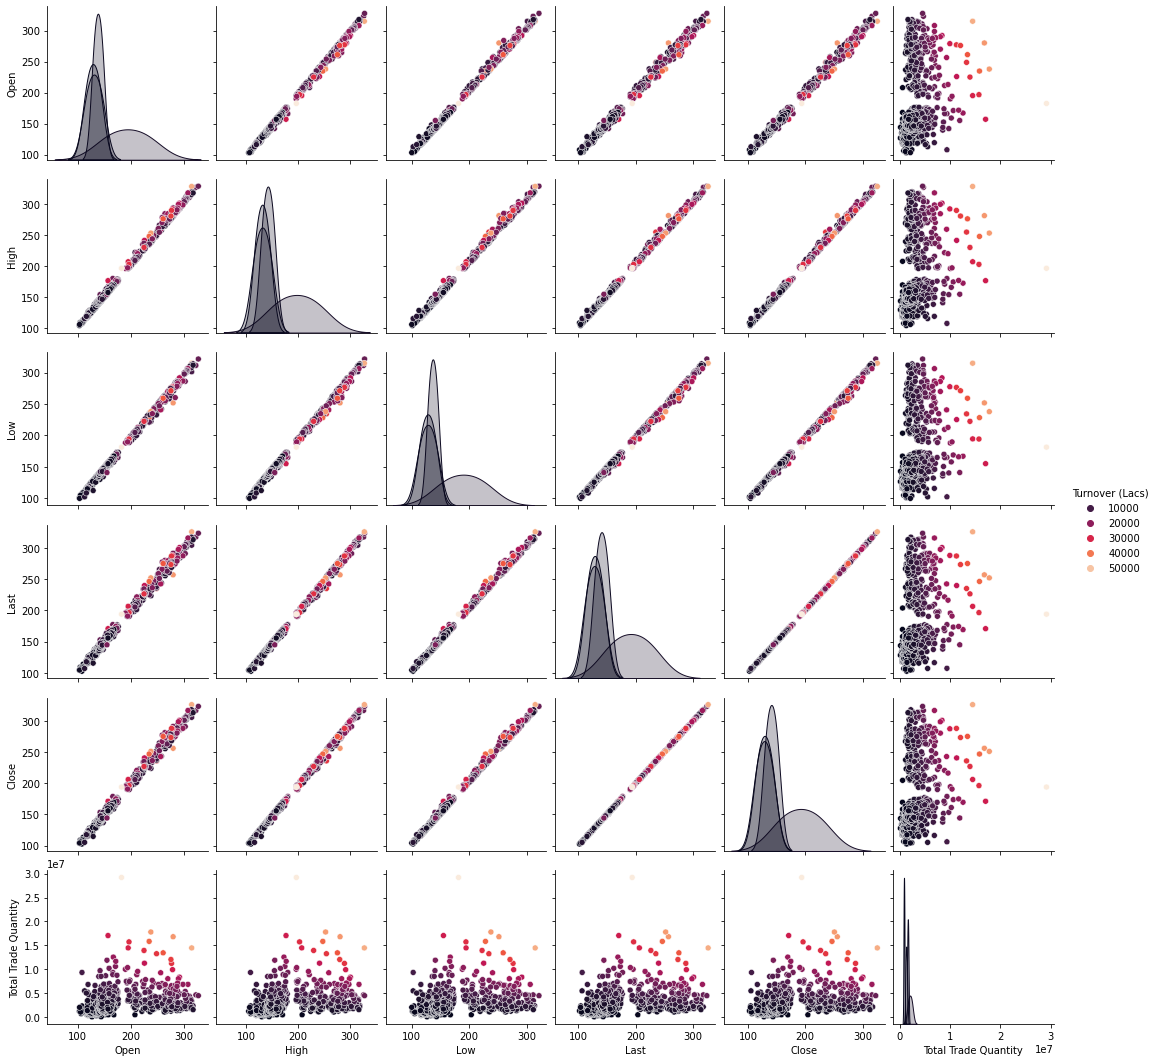

In [3]:
sns.pairplot(stock_df, hue= 'Turnover (Lacs)', palette= "rocket")
plt.show()

* **Since LSTM are sensitive to the scale of the data, so we apply MinMax Scaler to transform our values between 0 and 1**


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_high=stock_df.reset_index()['High']
df_high = scaler.fit_transform(np.array(df_high).reshape(-1,1))

In [5]:
training_size = int(len(df_high) * 0.75)
test_size = len(df_high) - training_size
train_data, test_data = df_high[0:training_size,:], df_high[training_size:len(df_high),:1]

### Data Preprocessing

In [6]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [7]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

### LSTM

* Reshape the input to be [samples, time steps, features] which is the requirement of LSTM


In [8]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

* **Import required modules for the stacked LSTM.**

In [9]:
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [10]:
#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

2023-02-19 07:12:19.225980: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-19 07:12:19.303708: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-19 07:12:19.304540: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-19 07:12:19.306105: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [11]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

2023-02-19 07:12:22.437400: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
13/13 [==============================] - 25s 1s/step - loss: 0.0470 - val_loss: 0.0059
Epoch 2/100
13/13 [==============================] - 16s 1s/step - loss: 0.0086 - val_loss: 0.0028
Epoch 3/100
13/13 [==============================] - 17s 1s/step - loss: 0.0040 - val_loss: 0.0016
Epoch 4/100
13/13 [==============================] - 16s 1s/step - loss: 0.0023 - val_loss: 0.0011
Epoch 5/100
13/13 [==============================] - 17s 1s/step - loss: 0.0019 - val_loss: 0.0012
Epoch 6/100
13/13 [==============================] - 16s 1s/step - loss: 0.0019 - val_loss: 0.0012
Epoch 7/100
13/13 [==============================] - 17s 1s/step - loss: 0.0019 - val_loss: 0.0011
Epoch 8/100
13/13 [==============================] - 16s 1s/step - loss: 0.0018 - val_loss: 9.8998e-04
Epoch 9/100
13/13 [==============================] - 17s 1s/step - loss: 0.0017 - val_loss: 0.0010
Epoch 10/100
13/13 [==============================] - 16s 1s/step - loss: 0.0017 - val_loss: 9.4454e-04
E

In [12]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [13]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [14]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

177.0493633095373

In [15]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

154.52987136248535

### Plotting the graph according to train and test data

In [16]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_high) - 1, :] = test_predict

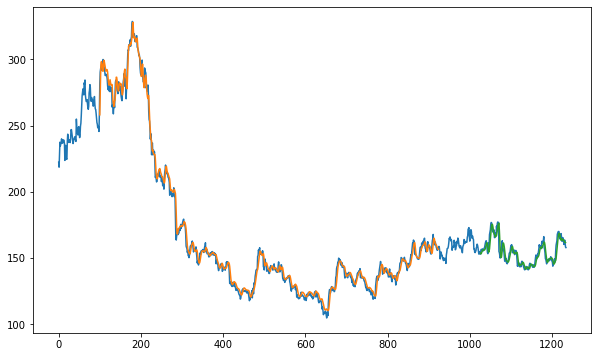

Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [17]:
#Plot baseline and predictions
plt.figure(figsize=(10,6))

plt.plot(scaler.inverse_transform(df_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")

In [18]:
x_input = test_data[8:].reshape(1,-1)
x_input

array([[0.20075842, 0.20209681, 0.19362034, 0.20209681, 0.19830471,
        0.19473567, 0.20120455, 0.19808164, 0.18402855, 0.2123578 ,
        0.22128039, 0.23377203, 0.23466429, 0.23555655, 0.24202543,
        0.2536248 , 0.26857015, 0.26589337, 0.27347758, 0.26611644,
        0.26009369, 0.26455499, 0.25786304, 0.22841847, 0.23622574,
        0.23957172, 0.24224849, 0.23867946, 0.26210127, 0.25317867,
        0.25563239, 0.22997992, 0.23354896, 0.24202543, 0.24559447,
        0.2587553 , 0.25384787, 0.26946241, 0.26589337, 0.25250948,
        0.24247156, 0.23934865, 0.23622574, 0.24380995, 0.24269462,
        0.23600268, 0.23087218, 0.22774928, 0.219942  , 0.23934865,
        0.24403301, 0.24715592, 0.26455499, 0.26210127, 0.25161722,
        0.25451706, 0.25607852, 0.25786304, 0.25563239, 0.25585545,
        0.27236226, 0.27726969, 0.29979924, 0.3006915 , 0.30470667,
        0.27258532, 0.25920143, 0.28106179, 0.29556101, 0.29779166,
        0.29109971, 0.26946241, 0.27503904, 0.27

### Predicting values for next 30 days

In [19]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=300
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.20209681 0.19362034 0.20209681 0.19830471 0.19473567 0.20120455
 0.19808164 0.18402855 0.2123578  0.22128039 0.23377203 0.23466429
 0.23555655 0.24202543 0.2536248  0.26857015 0.26589337 0.27347758
 0.26611644 0.26009369 0.26455499 0.25786304 0.22841847 0.23622574
 0.23957172 0.24224849 0.23867946 0.26210127 0.25317867 0.25563239
 0.22997992 0.23354896 0.24202543 0.24559447 0.2587553  0.25384787
 0.26946241 0.26589337 0.25250948 0.24247156 0.23934865 0.23622574
 0.24380995 0.24269462 0.23600268 0.23087218 0.22774928 0.219942
 0.23934865 0.24403301 0.24715592 0.26455499 0.26210127 0.25161722
 0.25451706 0.25607852 0.25786304 0.25563239 0.25585545 0.27236226
 0.27726969 0.29979924 0.3006915  0.30470667 0.27258532 0.25920143
 0.28106179 0.29556101 0.29779166 0.29109971 0.26946241 0.27503904
 0.27615436 0.26723176 0.26455499 0.23287977 0.23310283 0.22194959
 0.22038813 0.22418024 0.22708008 0.23734107 0.24046398 0.24894044
 0.24492527 0.23689494 0.22641089 0.2154807  0.22172

In [20]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)


In [24]:
ds3 = df_high.tolist()
ds3.extend(lst_output)

* **Graph of predicted values for next 30 days**

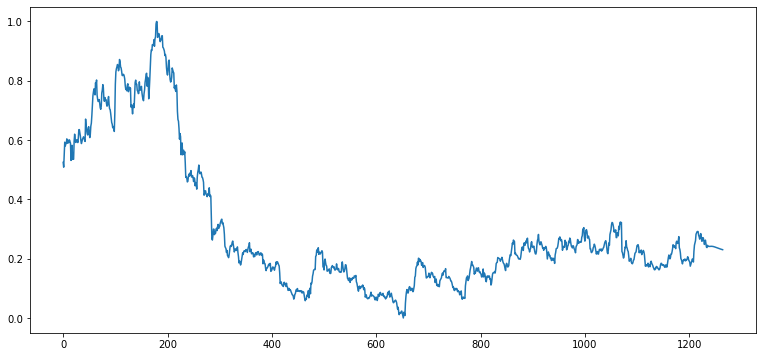

In [22]:
plt.figure(figsize=(13,6))

ds3=df_high.tolist()
ds3.extend(lst_output)
plt.plot(ds3[:])
plt.show()

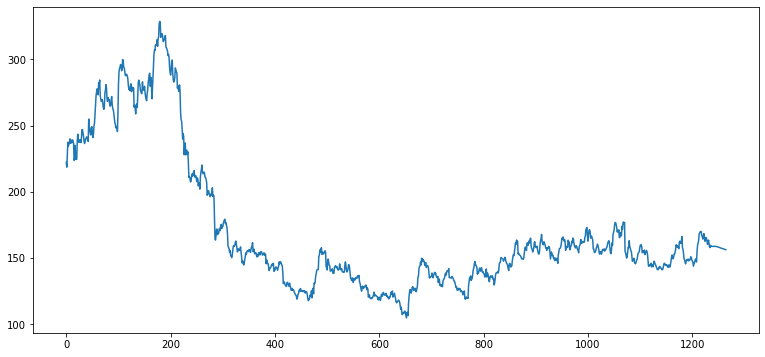

In [23]:
plt.figure(figsize=(13,6))

ds3=scaler.inverse_transform(ds3).tolist()
plt.plot(ds3)

plt.show()